# Model Training

#### importing data and library

In [11]:
# basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# metrics, pre processor and encoders
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/tarun9804/misc/main/Datasets/Regression/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.rename(columns={'math score':'math_score', 'reading score':'reading_score',
       'writing score':'writing_score'},inplace=True)

In [ ]:
x=df.drop(columns=['math_score'])

In [7]:
x.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [8]:
y=df['math_score']

## Encoding and standardization

In [12]:
num_df=x.select_dtypes(exclude='object').columns
cat_df=x.select_dtypes(include='object').columns

num_transformer=StandardScaler()
onehot_transformer=OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('Onehotencoder',onehot_transformer,cat_df),
        ('StandardScalar',num_transformer,num_df)
    ]
)


In [13]:
x_transformed=preprocessor.fit_transform(x)

In [14]:
x_transformed.shape

(1000, 19)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=0.2,random_state=234)

In [16]:
x_train.shape

(800, 19)

In [17]:
x_test.shape

(200, 19)

In [18]:
def evaluate_model(actual,pred):
    mae=mean_absolute_error(actual,pred)
    mse=mean_squared_error(actual,pred)
    rmse=np.sqrt(mse)
    r2_square=r2_score(actual,pred)
    return mae,rmse,r2_square

In [19]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-NearestNeighbour":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "RandomForest":RandomForestRegressor(),
    "XGBoost":XGBRegressor(),
    "AdaBoost":AdaBoostRegressor()
}

In [29]:
for i in models:
    print(i)

Linear Regression
Lasso
Ridge
K-NearestNeighbour
DecisionTree
RandomForest
XGBoost
AdaBoost


In [30]:
model_list=[]
r2_list=[]

for i in models:
    model=models[i]
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    model_list.append(i)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Model performance for Training set
- Root Mean Squared Error: 5.3408
- Mean Absolute Error: 4.2710
- R2 Score: 0.8773
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2735
- Mean Absolute Error: 4.1808
- R2 Score: 0.8728


Model performance for Training set
- Root Mean Squared Error: 6.5214
- Mean Absolute Error: 5.1724
- R2 Score: 0.8170
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6933
- Mean Absolute Error: 5.1711
- R2 Score: 0.7951


Model performance for Training set
- Root Mean Squared Error: 5.3411
- Mean Absolute Error: 4.2714
- R2 Score: 0.8773
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2726
- Mean Absolute Error: 4.1751
- R2 Score: 0.8728


Model performance for Training set
- Root Mean Squared Error: 5.8370
- Mean Absolute Error: 4.6375
- R2 Score: 0.8534
----------------------------------
Model performance for Test set
- Root Me

In [31]:
out_df=pd.DataFrame(list(zip(model_list,r2_list)),columns=['model','r2'])

In [32]:
out_df

,model,r2
0,Linear Regression,0.872798
1,Lasso,0.795082
2,Ridge,0.872840
3,K-NearestNeighbour,0.762886
4,DecisionTree,0.670096
5,RandomForest,0.846570
6,XGBoost,0.823511
7,AdaBoost,0.846335


In [34]:
out_df.sort_values(by='r2',ascending=False)

,model,r2
2,Ridge,0.872840
0,Linear Regression,0.872798
5,RandomForest,0.846570
7,AdaBoost,0.846335
6,XGBoost,0.823511
1,Lasso,0.795082
3,K-NearestNeighbour,0.762886
4,DecisionTree,0.670096


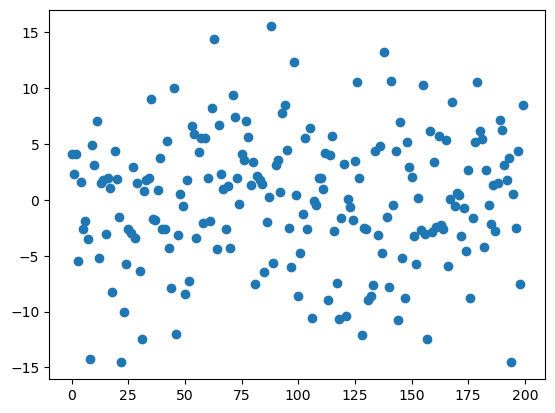

In [40]:
plt.scatter(list(range(len(y_test))),y_test-y_test_pred)

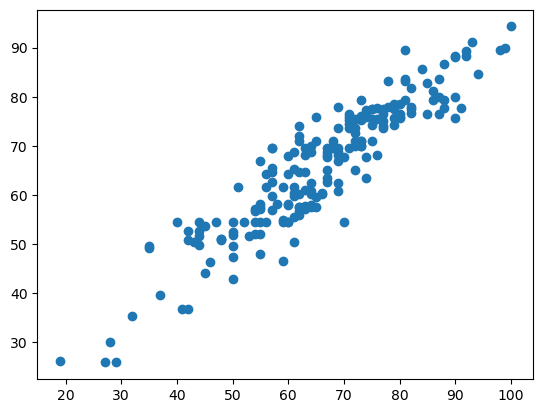

In [41]:
plt.scatter(y_test,y_test_pred)

<Axes: xlabel='math_score'>

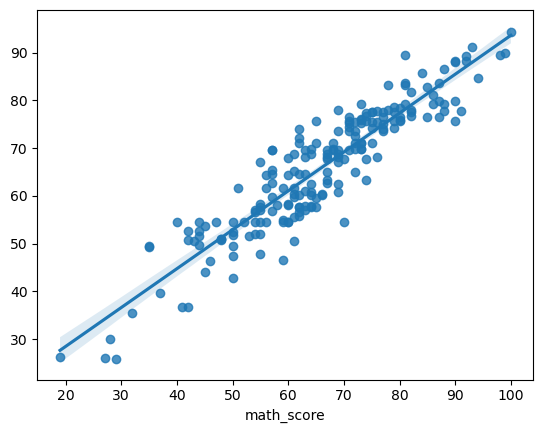

In [42]:
sns.regplot(x=y_test,y=y_test_pred)